# 数据探索

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv(open(r"C:\Users\love_j\Desktop\金融风控\train.csv"))
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [6]:
with open(r"C:\Users\love_j\Desktop\金融风控\testA.csv") as f:
    test = pd.read_csv(f)
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [14]:
print(train.columns,type(list(train.columns)))

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object') <class 'list'>


In [20]:
print(train.columns)
print(test.columns)
col = [i  for i in list(train.columns) if i not in list(test.columns)]
col

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')
Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptc

['isDefault']

In [ ]:
# 对训练集进行数据处理

In [32]:
# 数值型变量，字符型变量
def get_type(data):
    char = []
    numeric = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            char.append(i)
        else: numeric.append(i)
    return char,numeric

In [35]:
char,numeric = get_type(train)

In [36]:
char

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [37]:
# 填补缺失值
### The function making up missing values in Continuous or Categorical variable
def MakeupMissing(df,col,type,method):
    '''
    :param df: dataset containing columns with missing value
    :param col: columns with missing value
    :param type: the type of the column, should be Continuous or Categorical
    :return: the made up columns
    '''
    #Take the sample with non-missing value in col
    validDf = df.loc[df[col] == df[col]][[col]]          #筛选出此列无缺失值的数据
    if validDf.shape[0] == df.shape[0]:                  #判断是否缺失
        return 'There is no missing value in {}'.format(col)

    #copy the original value from col to protect the original dataframe
    missingList = [i for i in df[col]]
    if type == 'Continuous':
        if method not in ['Mean','Random']:
            return 'Please specify the correct treatment method for missing continuous variable!'
        #get the descriptive statistics of col
        descStats = validDf[col].describe()
        mu = descStats['mean']
        std = descStats['std']
        maxVal = descStats['max']
        #detect the extreme value using 3-sigma method   #如果极值大于均值+3*std，修改极值为均值+3*std
        if maxVal > mu+3*std:
            for i in list(validDf.index):
                if validDf.loc[i][col] > mu+3*std:
                    #decrease the extreme value to normal level
                    validDf.loc[i][col] = mu + 3 * std
            #re-calculate the mean based on cleaned data
            mu = validDf[col].describe()['mean']
        for i in range(df.shape[0]):                    #
            if df.loc[i][col] != df.loc[i][col]:        #筛选出空值，填补空值
                #use the mean or sampled data to replace the missing value
                if method == 'Mean':
                    missingList[i] = mu
                elif method == 'Random':
                    missingList[i] = random.sample(validDf[col].tolist(),1)[0]
    elif type == 'Categorical':
        if method not in ['Mode', 'Random']:
            return 'Please specify the correct treatment method for missing categorical variable!'
        #calculate the probability of each type of the categorical variable
        freqDict = {}
        recdNum = validDf.shape[0]
        for v in set(validDf[col]):
            vDf = validDf.loc[validDf[col] == v]
            freqDict[v] = vDf.shape[0] * 1.0 / recdNum      #变量出现的概率
        #find the category with highest probability
        modeVal = max(freqDict.items(), key=lambda x: x[1])[0]   #筛选最大的概率
        freqTuple = freqDict.items()
        # cumulative sum of each category
        freqList = [0]+[i[1] for i in freqTuple]           #变量的概率值 eg：[0,p1,p2,p3]
        freqCumsum = np.cumsum(freqList)                      # 变量的累加概率值 eg：[0,p1,p1+p2,p1+p2+p3]
        for i in range(df.shape[0]):
            if df.loc[i][col] != df.loc[i][col]:
                if method == 'Mode':
                    missingList[i] = modeVal
                if method == 'Random':
                    #determine the sampled category using unifor distributed random variable
                    a = random.random()
                    position = [k+1 for k in range(len(freqCumsum)-1) if freqCumsum[k]<a<=freqCumsum[k+1]][0]  #a在freqCumsum其中两个值中选后一个值
                    missingList[i] = list(freqTuple)[position-1][0]
    else:
        print ('The missing value in {0} has been made up with the mothod of {1}'.format(col, method))
    return missingList

In [12]:
# numeric.remove("id")

In [38]:
# 填补数值型缺失值
def get_make_missing(data,col):
    for i in col:
        if data[i].isnull().sum() != 0:
            data[i] = MakeupMissing(data,i,'Continuous','Random')
    return data

In [56]:
train = get_make_missing(train,numeric)

In [70]:
# 填补字符型缺失值
def make_char_missing(data,col):
    for i in col:
        if data[i].isnull().sum() != 0:
            data[i] = MakeupMissing(data,i,'Categorical','Random')
    return data

In [25]:
train = make_char_missing(train,char)

In [27]:
# train.to_csv("data_miss.csv")

In [40]:
train = pd.read_csv("data_miss.csv",index_col=0)
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,2.0,9.0,10.0,13.0,6.0,13.0,0.0,0.0,0.0,3.0
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,6 years,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


# 数据预处理

In [41]:
train['employmentLength'].value_counts(dropna=False).sort_index()

1 year        55738
10+ years    279035
2 years       76837
3 years       68125
4 years       50945
5 years       53207
6 years       39495
7 years       37637
8 years       38498
9 years       32164
< 1 year      68319
Name: employmentLength, dtype: int64

In [42]:
train['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
train['employmentLength'].replace('< 1 year', '0 years', inplace=True)

def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
    
train['employmentLength'] = train['employmentLength'].apply(employmentLength_to_int)

In [43]:
train['employmentLength'].value_counts(dropna=False).sort_index()

0      68319
1      55738
2      76837
3      68125
4      50945
5      53207
6      39495
7      37637
8      38498
9      32164
10    279035
Name: employmentLength, dtype: int64

In [44]:
train['earliesCreditLine'].sample(5)

549112    Apr-2003
525242    Jan-2005
224261    Sep-1998
405245    May-1994
685342    Apr-1998
Name: earliesCreditLine, dtype: object

In [45]:
train['earliesCreditLine'] = train['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [46]:
train['earliesCreditLine'].describe()

count    800000.000000
mean       1998.687231
std           7.606971
min        1944.000000
25%        1995.000000
50%        2000.000000
75%        2004.000000
max        2015.000000
Name: earliesCreditLine, dtype: float64

In [47]:
# 查看各个变量的类别数量
# 部分类别特征
def make_var_count(data,char):
    var_count = []
    for f in char:
        var_count.append([f, data[f].nunique()])
    return pd.DataFrame(var_count,columns=["var","count"])

In [48]:
var_count = make_var_count(train,char)
var_count

,var,count
0,grade,7
1,subGrade,35
2,employmentLength,11
3,issueDate,139
4,earliesCreditLine,68


In [50]:
# one hot encode
# 类型数在2之上，又不是高维稀疏的
train = pd.get_dummies(train, columns=['grade', 'subGrade'], drop_first=True)

In [51]:
train.head()

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5
0,0,35000.0,5,19.52,917.97,320.0,2,2,110000.0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,18000.0,5,18.49,461.90,219843.0,5,0,46000.0,2,...,0,0,0,0,0,0,0,0,0,0
2,2,12000.0,5,16.99,298.17,31698.0,8,0,74000.0,2,...,0,0,0,0,0,0,0,0,0,0
3,3,11000.0,3,7.26,340.96,46854.0,10,1,118000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,3000.0,3,12.99,101.07,54.0,6,1,29000.0,2,...,0,0,0,0,0,0,0,0,0,0


# 变量之间的相似性

In [52]:
train.corr()

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5
id,1.000000,-0.000064,-0.000941,0.000524,0.000231,-0.000482,0.000362,-0.000135,0.001641,0.002043,...,0.000740,-0.001076,-0.000171,0.000545,-0.000447,-0.001999,0.000060,-0.000318,-0.000397,0.000859
loanAmnt,-0.000064,1.000000,0.381142,0.142288,0.953369,-0.020449,0.084583,-0.141214,0.315361,0.223371,...,0.042618,0.040085,0.034127,0.033769,0.036443,0.032276,0.023908,0.027432,0.023981,0.021444
term,-0.000941,0.381142,1.000000,0.416827,0.142894,0.002271,0.052004,-0.084503,0.051000,0.129071,...,0.105373,0.094228,0.080282,0.078123,0.070425,0.065759,0.052009,0.050571,0.044328,0.037803
interestRate,0.000524,0.142288,0.416827,1.000000,0.154550,0.062398,-0.003088,0.051608,-0.073364,0.255346,...,0.193313,0.174159,0.169547,0.158791,0.151836,0.138086,0.116375,0.106864,0.097908,0.092492
installment,0.000231,0.953369,0.142894,0.154550,1.000000,-0.014739,0.073194,-0.115779,0.305667,0.225758,...,0.040998,0.040332,0.037466,0.037521,0.042382,0.037639,0.029208,0.032386,0.029206,0.027828
employmentTitle,-0.000482,-0.020449,0.002271,0.062398,-0.014739,1.000000,-0.012916,-0.013376,-0.018927,0.010906,...,0.006304,0.008339,0.004334,0.005659,0.004411,0.002805,-0.001366,0.000379,-0.001666,-0.002661
employmentLength,0.000362,0.084583,0.052004,-0.003088,0.073194,-0.012916,1.000000,-0.119535,0.064274,0.027109,...,0.002353,0.001862,-0.000046,0.000775,0.002238,0.000860,0.001748,-0.000723,0.001299,-0.000636
homeOwnership,-0.000135,-0.141214,-0.084503,0.051608,-0.115779,-0.013376,-0.119535,1.000000,-0.117331,-0.007803,...,0.002649,0.003836,0.006459,0.005393,0.002848,0.003460,0.003865,0.000598,0.001131,0.001879
annualIncome,0.001641,0.315361,0.051000,-0.073364,0.305667,-0.018927,0.064274,-0.117331,1.000000,0.040493,...,-0.004378,-0.002750,-0.003477,-0.003375,-0.000148,-0.000554,-0.001812,0.000399,0.000875,0.001086
verificationStatus,0.002043,0.223371,0.129071,0.255346,0.225758,0.010906,0.027109,-0.007803,0.040493,1.000000,...,0.044696,0.043743,0.037661,0.037422,0.035285,0.029219,0.028483,0.025801,0.020741,0.019285


# 训练数据/测试数据准备

In [53]:
features = list(train.columns)
features.remove('id')
features.remove('issueDate')
features.remove('isDefault')

In [54]:
features

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'subGrade_A2',
 'subGrade_A3',
 'subGrade_A4',
 'subGrade_A5',
 'subGrade_B1',
 'subGrade_B2',
 'subGrade_B3',
 'subGrade_B4',
 'subGrade_B5',
 'subGrade_C1',
 'subGrade_C2',
 'subGrade_C3',
 'subGrade_C4',
 'subGrade_C5',
 'subGrade_D1',
 'subGrade_D2',
 'subGrade_D3',
 'subGrade_D4',
 'subGrade_D5',
 'subGrade_E1',
 'subGrade_E2',
 'subGrade_E3',
 'subGrade_E4',
 'subGrade_E5

In [55]:
#split the modeling dataset into trainning set and testing set
X_train, X_test, y_train, y_test = train_test_split(train[features],train['isDefault'], test_size=0.3,random_state=9)

# 利用xgboost计算变量重要性

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# learning_rate=0.1,max_delta_step=0, max_depth=3 :80.34%
# learning_rate=0.1,max_delta_step=0, max_depth=4 :80.41%
# learning_rate=0.1,max_depth=5 :80.47%
# learning_rate=0.1,max_depth=7 :80.53%

# learning_rate=0.05,max_depth=4 :80.25%


In [58]:
#建立xgboost模型，训练模型
model = XGBClassifier(learning_rate=0.1,max_depth=7)
model.fit(X_train,y_train)
#预测测试集数据
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:%.2f%%"%(accuracy * 100.0))

accuracy:80.53%


# 变量重要性

In [59]:
feature_importances = model.feature_importances_
feature_importances

array([0.01087951, 0.05135421, 0.19554615, 0.00961503, 0.01056471,
       0.00685607, 0.03044312, 0.00957431, 0.01279847, 0.00638857,
       0.0053828 , 0.0092101 , 0.0121144 , 0.00779652, 0.01258041,
       0.        , 0.00538253, 0.00697164, 0.00845191, 0.00891466,
       0.00598147, 0.00778696, 0.00776619, 0.00762024, 0.00725891,
       0.02246091, 0.        , 0.00597922, 0.00568557, 0.01112359,
       0.01309688, 0.0055391 , 0.0058534 , 0.00607635, 0.00560721,
       0.00588734, 0.00920497, 0.00628243, 0.        , 0.00561741,
       0.00556696, 0.01254131, 0.09128261, 0.01282004, 0.04110862,
       0.01160452, 0.00850882, 0.00463411, 0.00453318, 0.00712757,
       0.00514847, 0.00528674, 0.00523223, 0.01403625, 0.01141914,
       0.01994675, 0.01346279, 0.00914927, 0.02350898, 0.01863664,
       0.01172527, 0.00507465, 0.00375448, 0.00342176, 0.00462568,
       0.00425836, 0.00451651, 0.00706761, 0.00517904, 0.00471125,
       0.00570873, 0.00444429, 0.00519168, 0.00577468, 0.00694

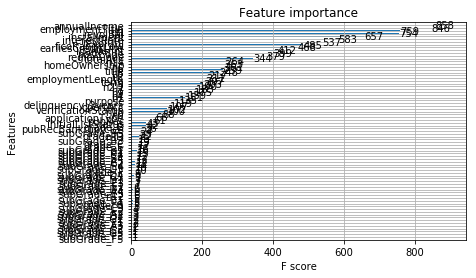

In [60]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
#画重要性
plot_importance(model)
plt.show()

In [62]:
var_importance = pd.DataFrame({"var":list(X_train.columns),"importance_score":list(feature_importances)})
var_importance

,var,importance_score
0,loanAmnt,0.010880
1,term,0.051354
2,interestRate,0.195546
3,installment,0.009615
4,employmentTitle,0.010565
5,employmentLength,0.006856
6,homeOwnership,0.030443
7,annualIncome,0.009574
8,verificationStatus,0.012798
9,purpose,0.006389


In [63]:
var_importance = var_importance.sort_values(by="importance_score",ascending=False)
var_importance

,var,importance_score
2,interestRate,0.195546
42,grade_B,0.091283
1,term,0.051354
44,grade_D,0.041109
6,homeOwnership,0.030443
58,subGrade_C2,0.023509
25,title,0.022461
55,subGrade_B4,0.019947
59,subGrade_C3,0.018637
53,subGrade_B2,0.014036


# 保存模型

In [64]:
#保存模型
import joblib
joblib.dump(model,"saveagain.dat")

ModuleNotFoundError: No module named 'joblib'

In [ ]:
#导入模型
load_model = joblib.load("saveagain.dat")

In [ ]:
#使用新导入的模型
load_model.score(X,y)

# 验证集验证模型

In [65]:
char,numeric = get_type(test)

In [66]:
print(char)
print(numeric)

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n2.2', 'n2.3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [67]:
numeric.remove("id")

In [68]:
test = get_make_missing(test,numeric)

In [71]:
test= make_char_missing(test,char)

In [ ]:
# 数据预处理

In [72]:
test['employmentLength'].value_counts(dropna=False).sort_index()

1 year       13957
10+ years    69910
2 years      19330
3 years      17016
4 years      12590
5 years      13316
6 years       9928
7 years       9395
8 years       9546
9 years       8044
< 1 year     16968
Name: employmentLength, dtype: int64

In [73]:
test['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
test['employmentLength'].replace('< 1 year', '0 years', inplace=True)

In [74]:
test['employmentLength'] = test['employmentLength'].apply(employmentLength_to_int)

In [75]:
test['employmentLength'].value_counts(dropna=False).sort_index()

0     16968
1     13957
2     19330
3     17016
4     12590
5     13316
6      9928
7      9395
8      9546
9      8044
10    69910
Name: employmentLength, dtype: int64

In [76]:
test['earliesCreditLine'] = test['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [77]:
var_count = make_var_count(test,char)

In [78]:
var_count

,var,count
0,grade,7
1,subGrade,35
2,employmentLength,11
3,issueDate,138
4,earliesCreditLine,69


In [79]:
# one hot encode
# 类型数在2之上，又不是高维稀疏的
test = pd.get_dummies(test, columns=['grade', 'subGrade'], drop_first=True)

In [ ]:
# test= make_char_missing(test,char)
# 数据预处理
# test['employmentLength'].value_counts(dropna=False).sort_index()

# test['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
# test['employmentLength'].replace('< 1 year', '0 years', inplace=True)

# test['employmentLength'] = test['employmentLength'].apply(employmentLength_to_int)

# test['employmentLength'].value_counts(dropna=False).sort_index()

# test['earliesCreditLine'] = test['earliesCreditLine'].apply(lambda s: int(s[-4:]))

# var_count = make_var_count(test,char)

# # one hot encode
# # 类型数在2之上，又不是高维稀疏的
# test = pd.get_dummies(test, columns=['grade', 'subGrade'], drop_first=True)

In [81]:
#预测测试集数据
y_predict = model.predict(test[features])

In [87]:
y_predict_proba = model.predict_proba(test[features])

In [94]:
type(y_predict_proba)

numpy.ndarray

In [93]:
len(test["id"])

200000

In [86]:
help(model)

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecated. Use verbosity instead.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
 |  

In [97]:
result_int = pd.DataFrame({"id":test["id"],"isDefault":y_predict})

In [101]:
result = pd.DataFrame({"id":test["id"],"isDefault":list(y_predict_proba)})

In [98]:
result_int.head()

,id,isDefault
0,800000,0
1,800001,0
2,800002,1
3,800003,0
4,800004,0


In [99]:
result.head(5)

,id,isDefault
0,800000,"[0.9229558, 0.07704419]"
1,800001,"[0.6802445, 0.3197555]"
2,800002,"[0.4615875, 0.5384125]"
3,800003,"[0.70366275, 0.29633728]"
4,800004,"[0.6426675, 0.35733253]"


In [102]:
result["isDefault"] = result["isDefault"].map(lambda x:x[1])

In [103]:
result.head(5)

,id,isDefault
0,800000,0.077044
1,800001,0.319755
2,800002,0.538413
3,800003,0.296337
4,800004,0.357333


In [104]:
result.to_csv("sample_submit.csv",index=False)